# Ecommerce POC

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import math as ma
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from math import sqrt
from sklearn import tree
import scipy.stats as ss
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [6]:
Ecom_Data = pd.read_csv("C:\\Users\\Dell 5370\\Desktop\\0Data Science  Programme Material\\Data Science Case Studies\\2022 Ecommerce\\ecom.csv")

In [7]:
Ecom_Data.head()

,Gender,Marital status,age group,Educatuon,income,Job,Area,CBB_9,CBB_10,CBB_11,...,FACT__21,FACT__22,FACT__23,FACT__24,FACT__25,FACT__26,FACT__27,FACT__28,FACT__29,FACT__30
0,Female,Unmarried,36-45,Graduation,"Above 80,000",Self Employee,Town,10-Sep,above 5000,cas on delivery,...,neutral,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree
1,Female,Unmarried,46-55,Graduation,"Above 80,000",Self Employee,Urban,10-Sep,above 5000,credit cards,...,strongly agree,agree,strongly agree,agree,strongly agree,agree,strongly agree,agree,strongly agree,agree
2,Female,Unmarried,46-55,Intermediate/10+2,"Above 80,000",Self Employee,Urban,08-Jul,500-1000,cas on delivery,...,neutral,neutral,neutral,neutral,neutral,strongly agree,strongly agree,strongly agree,agree,neutral
3,Female,Unmarried,46-55,Intermediate/10+2,"Above 80,000",Employed,Urban,08-Jul,500-1000,cas on delivery,...,neutral,strongly agree,neutral,neutral,neutral,neutral,strongly agree,neutral,neutral,neutral
4,Female,Unmarried,46-55,Intermediate/10+2,"Above 80,000",Employed,Urban,10-Sep,above 5000,credit cards,...,strongly agree,agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree


In [9]:
Ecom_Data.columns

Index(['Gender', 'Marital status', 'age group', 'Educatuon', 'income', 'Job',
       'Area', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14',
       'FACT__1', 'FACT__2', 'FACT__3', 'FACT__4', 'FACT__5', 'FACT__6',
       'FACT__7', 'FACT__8', 'FACT__9', 'FACT__10', 'FACT__11', 'FACT__12',
       'FACT__13', 'FACT__14', 'FACT__15', 'FACT__16', 'FACT__17', 'FACT__18',
       'FACT__19', 'FACT__20', 'FACT__21', 'FACT__22', 'FACT__23', 'FACT__24',
       'FACT__25', 'FACT__26', 'FACT__27', 'FACT__28', 'FACT__29', 'FACT__30'],
      dtype='object')

In [10]:
Ecom_Data.describe()

,Gender,Marital status,age group,Educatuon,income,Job,Area,CBB_9,CBB_10,CBB_11,...,FACT__21,FACT__22,FACT__23,FACT__24,FACT__25,FACT__26,FACT__27,FACT__28,FACT__29,FACT__30
count,727,727,727,727,727,727,727,727,727,727,...,727,727,727,727,727,727,727,727,727,727
unique,2,2,5,4,4,4,5,5,3,5,...,4,4,4,4,3,4,3,4,4,4
top,Male,Married,36-45,Post-Graduation,"Above 80,000",Employed,Urban,08-Jul,above 5000,credit cards,...,neutral,agree,neutral,neutral,strongly agree,neutral,strongly agree,disagree,neutral,strongly agree
freq,373,427,235,199,242,254,230,213,592,481,...,326,240,271,340,457,260,693,252,249,402


In [12]:
# converting required variables into factors
#Since factor columns are already segregated fact1 to fact30.
print(Ecom_Data.head())



   Gender Marital status age group          Educatuon        income  \
0  Female      Unmarried     36-45         Graduation  Above 80,000   
1  Female      Unmarried     46-55         Graduation  Above 80,000   
2  Female      Unmarried     46-55  Intermediate/10+2  Above 80,000   
3  Female      Unmarried     46-55  Intermediate/10+2  Above 80,000   
4  Female      Unmarried     46-55  Intermediate/10+2  Above 80,000   

             Job   Area   CBB_9      CBB_10           CBB_11       ...        \
0  Self Employee   Town  10-Sep  above 5000  cas on delivery       ...         
1  Self Employee  Urban  10-Sep  above 5000     credit cards       ...         
2  Self Employee  Urban  08-Jul    500-1000  cas on delivery       ...         
3       Employed  Urban  08-Jul    500-1000  cas on delivery       ...         
4       Employed  Urban  10-Sep  above 5000     credit cards       ...         

         FACT__21        FACT__22        FACT__23        FACT__24  \
0         neutral  stro

In [13]:

Ecom_Data.shape

(727, 43)

In [14]:
# creating new data frame
Ec_Data = Ecom_Data
Ec_Data.isnull().sum()

Gender            0
Marital status    0
age group         0
Educatuon         0
income            0
Job               0
Area              0
CBB_9             0
CBB_10            0
CBB_11            0
CBB_12            0
CBB_13            0
CBB_14            0
FACT__1           0
FACT__2           0
FACT__3           0
FACT__4           0
FACT__5           0
FACT__6           0
FACT__7           0
FACT__8           0
FACT__9           0
FACT__10          0
FACT__11          0
FACT__12          0
FACT__13          0
FACT__14          0
FACT__15          0
FACT__16          0
FACT__17          8
FACT__18          8
FACT__19          0
FACT__20          0
FACT__21          0
FACT__22          0
FACT__23          0
FACT__24          0
FACT__25          0
FACT__26          0
FACT__27          0
FACT__28          0
FACT__29          0
FACT__30          0
dtype: int64

In [15]:
# creating another data set
Ey_Data = Ecom_Data
Ey_Data = Ey_Data.fillna(method='pad')
Ey_Data.isnull().sum()

Gender            0
Marital status    0
age group         0
Educatuon         0
income            0
Job               0
Area              0
CBB_9             0
CBB_10            0
CBB_11            0
CBB_12            0
CBB_13            0
CBB_14            0
FACT__1           0
FACT__2           0
FACT__3           0
FACT__4           0
FACT__5           0
FACT__6           0
FACT__7           0
FACT__8           0
FACT__9           0
FACT__10          0
FACT__11          0
FACT__12          0
FACT__13          0
FACT__14          0
FACT__15          0
FACT__16          0
FACT__17          0
FACT__18          0
FACT__19          0
FACT__20          0
FACT__21          0
FACT__22          0
FACT__23          0
FACT__24          0
FACT__25          0
FACT__26          0
FACT__27          0
FACT__28          0
FACT__29          0
FACT__30          0
dtype: int64

In [19]:
# Filling null values with forward or backword fill
Ec_Data = Ec_Data.fillna(method='pad')
Ec_Data.isnull().sum()
y = len(Ec_Data.columns)
Ey_Data = Ec_Data
y

43

In [21]:
# New code # using label encoder & for loop converting to factors above defined columns
lb_make = LabelEncoder()
for i in range(y):
    Ey_Data[Ec_Data.columns[i]] = lb_make.fit_transform(Ey_Data[Ec_Data.columns[i]])
    i+=1
print("its done") 

its done


In [22]:
Ey_Data.head()
Ec_Data.columns

Index(['Gender', 'Marital status', 'age group', 'Educatuon', 'income', 'Job',
       'Area', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14',
       'FACT__1', 'FACT__2', 'FACT__3', 'FACT__4', 'FACT__5', 'FACT__6',
       'FACT__7', 'FACT__8', 'FACT__9', 'FACT__10', 'FACT__11', 'FACT__12',
       'FACT__13', 'FACT__14', 'FACT__15', 'FACT__16', 'FACT__17', 'FACT__18',
       'FACT__19', 'FACT__20', 'FACT__21', 'FACT__22', 'FACT__23', 'FACT__24',
       'FACT__25', 'FACT__26', 'FACT__27', 'FACT__28', 'FACT__29', 'FACT__30'],
      dtype='object')

In [25]:
Ec_Data.shape
Ec_Data.head(10)

,Gender,Marital status,age group,Educatuon,income,Job,Area,CBB_9,CBB_10,CBB_11,...,FACT__21,FACT__22,FACT__23,FACT__24,FACT__25,FACT__26,FACT__27,FACT__28,FACT__29,FACT__30
0,0,1,1,0,0,3,2,4,2,0,...,2,3,3,3,2,3,2,3,3,3
1,0,1,2,0,0,3,3,4,2,1,...,3,0,3,0,2,0,2,0,3,0
2,0,1,2,1,0,3,3,3,1,0,...,2,2,2,2,1,3,2,3,0,2
3,0,1,2,1,0,0,3,3,1,0,...,2,3,2,2,1,2,2,2,2,2
4,0,1,2,1,0,0,3,4,2,1,...,3,0,3,3,2,3,2,3,3,3
5,0,1,2,0,0,0,3,3,2,1,...,2,2,3,3,2,3,2,3,0,3
6,0,1,2,0,0,0,3,3,2,1,...,3,0,3,0,2,0,2,0,0,0
7,0,1,0,0,0,0,4,4,2,0,...,3,3,3,3,2,3,2,3,3,3
8,0,1,4,0,0,0,1,3,2,1,...,2,3,3,3,2,3,2,3,0,3
9,0,1,0,1,0,0,4,4,2,0,...,3,0,3,3,2,3,2,3,3,3


In [26]:
Ecom_Data.head()

,Gender,Marital status,age group,Educatuon,income,Job,Area,CBB_9,CBB_10,CBB_11,...,FACT__21,FACT__22,FACT__23,FACT__24,FACT__25,FACT__26,FACT__27,FACT__28,FACT__29,FACT__30
0,Female,Unmarried,36-45,Graduation,"Above 80,000",Self Employee,Town,10-Sep,above 5000,cas on delivery,...,neutral,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree
1,Female,Unmarried,46-55,Graduation,"Above 80,000",Self Employee,Urban,10-Sep,above 5000,credit cards,...,strongly agree,agree,strongly agree,agree,strongly agree,agree,strongly agree,agree,strongly agree,agree
2,Female,Unmarried,46-55,Intermediate/10+2,"Above 80,000",Self Employee,Urban,08-Jul,500-1000,cas on delivery,...,neutral,neutral,neutral,neutral,neutral,strongly agree,strongly agree,strongly agree,agree,neutral
3,Female,Unmarried,46-55,Intermediate/10+2,"Above 80,000",Employed,Urban,08-Jul,500-1000,cas on delivery,...,neutral,strongly agree,neutral,neutral,neutral,neutral,strongly agree,neutral,neutral,neutral
4,Female,Unmarried,46-55,Intermediate/10+2,"Above 80,000",Employed,Urban,10-Sep,above 5000,credit cards,...,strongly agree,agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree,strongly agree


In [35]:
Ec_Data1= pd.DataFrame()
Ec_Data1.head()

""


In [36]:
Edemo= pd.DataFrame()
Edemo = Ec_Data[['Gender', 'Marital status', 'age group', 'Educatuon', 'income', 'Job',
       'Area', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14']]
Edemo.head()

,Gender,Marital status,age group,Educatuon,income,Job,Area,CBB_9,CBB_10,CBB_11,CBB_12,CBB_13,CBB_14
0,0,1,1,0,0,3,2,4,2,0,3,4,0
1,0,1,2,0,0,3,3,4,2,1,3,0,2
2,0,1,2,1,0,3,3,3,1,0,3,4,2
3,0,1,2,1,0,0,3,3,1,0,0,4,1
4,0,1,2,1,0,0,3,4,2,1,3,4,2


In [37]:
# Applying PCA to factor variabls to reduce the dimensions
# creating data set only with factor elements
Ec_Data1 = Ec_Data[["FACT__1","FACT__2","FACT__3","FACT__4","FACT__5","FACT__6","FACT__7","FACT__8","FACT__9","FACT__10","FACT__11","FACT__12","FACT__13","FACT__14","FACT__15","FACT__16","FACT__17","FACT__18","FACT__19","FACT__20","FACT__21","FACT__22","FACT__23","FACT__24","FACT__25","FACT__26","FACT__27","FACT__28","FACT__29","FACT__30"]]
Ec_Data1.shape
Ec_Data1.head()

,FACT__1,FACT__2,FACT__3,FACT__4,FACT__5,FACT__6,FACT__7,FACT__8,FACT__9,FACT__10,...,FACT__21,FACT__22,FACT__23,FACT__24,FACT__25,FACT__26,FACT__27,FACT__28,FACT__29,FACT__30
0,3,2,2,3,3,2,3,0,3,0,...,2,3,3,3,2,3,2,3,3,3
1,3,2,2,3,3,2,0,0,3,3,...,3,0,3,0,2,0,2,0,3,0
2,0,2,2,0,0,1,3,0,0,0,...,2,2,2,2,1,3,2,3,0,2
3,3,2,2,2,0,1,2,0,2,2,...,2,3,2,2,1,2,2,2,2,2
4,3,2,2,3,3,1,3,0,3,3,...,3,0,3,3,2,3,2,3,3,3


In [38]:
# checking cronbach alpha value to under satand reliability
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=1, ddof=1)
    tscores = itemscores.sum(axis=0)
    nitems = len(itemscores)

    return nitems / (nitems-1.) * (1 - itemvars.sum() / tscores.var(ddof=1))

In [39]:
# CronbachAlpha Test
CronbachAlpha(Ec_Data)

0.9966009524492323

In [40]:
# CronbachAlpha Test
CronbachAlpha(Ey_Data)

0.9966009524492323

In [41]:
Ey_Data.columns

Index(['Gender', 'Marital status', 'age group', 'Educatuon', 'income', 'Job',
       'Area', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14',
       'FACT__1', 'FACT__2', 'FACT__3', 'FACT__4', 'FACT__5', 'FACT__6',
       'FACT__7', 'FACT__8', 'FACT__9', 'FACT__10', 'FACT__11', 'FACT__12',
       'FACT__13', 'FACT__14', 'FACT__15', 'FACT__16', 'FACT__17', 'FACT__18',
       'FACT__19', 'FACT__20', 'FACT__21', 'FACT__22', 'FACT__23', 'FACT__24',
       'FACT__25', 'FACT__26', 'FACT__27', 'FACT__28', 'FACT__29', 'FACT__30'],
      dtype='object')

In [47]:
# creating covariance matrix
CVM = PCA(n_components=30)
# calculating eigen values
CVM.fit(Ec_Data1)

PCA(n_components=30)

In [48]:
#calculate variance ratios
variance = CVM.explained_variance_ratio_
#cumulative sum of variance explained with [n] features
var=np.cumsum(np.round(variance, decimals=3)*100)
var

array([ 28.2,  40.9,  52. ,  60.6,  67.5,  73.4,  77.7,  80.9,  83.5,
        85.7,  87.4,  88.9,  90.2,  91.3,  92.3,  93.2,  94.1,  94.9,
        95.7,  96.4,  97. ,  97.6,  98.2,  98.7,  99.2,  99.5,  99.8,
       100. , 100. , 100. ])

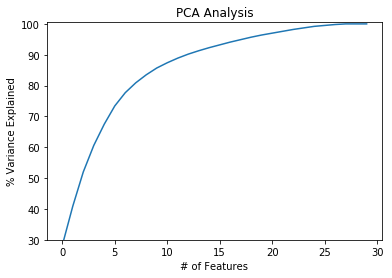

In [49]:
# plotting of variance explained
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [70]:
# fitting PCA components to a data frame
pca_CVM = CVM.fit_transform(Ec_Data1)
pca_df = pd.DataFrame(data=pca_CVM,columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20','pc21','pc22','pc23','pc24','pc25','pc26','pc27','pc28','pc29','pc30'])
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30
0,-4.338365,-2.969082,0.008515,-0.758741,0.222836,-0.819732,-0.080693,-0.437382,0.173655,-0.537369,...,-0.171533,0.957984,0.314764,-0.138889,1.214763,-0.375762,0.001292,-0.023182,-0.931856,-6.695130e-15
1,-1.422389,3.031545,-2.889961,-2.058350,3.209062,1.848032,1.933170,-0.728288,1.196076,0.008489,...,-0.308170,-0.521261,-0.075761,-0.107714,0.066845,-0.106687,0.025078,0.145780,-0.932388,1.341742e-15
2,0.092274,-0.405955,2.833661,-1.583581,-0.337161,-2.083084,0.142646,2.892139,-0.408684,-0.068979,...,0.676441,-0.983688,0.203759,-0.117458,0.199379,0.086223,0.264594,-0.291559,-0.053934,2.440628e-14
3,0.767100,0.607277,-0.128636,0.323350,0.627438,-2.043069,-1.277789,-0.341761,-1.164115,1.538196,...,0.232316,1.044636,0.639579,-0.056154,-1.231965,0.135027,-0.747173,0.509202,0.012779,-1.262180e-14
4,-4.447377,-2.368054,-1.824174,0.686196,1.126454,0.709377,1.472043,1.489187,-0.474811,-0.183053,...,-0.141545,-0.087037,-0.203506,-0.023132,-0.105855,-0.121676,0.060256,0.075171,0.026397,-2.785378e-15


In [69]:
# fitting PCA components to a data frame
pca_CVM = CVM.fit_transform(Ec_Data1)
pca_df = pd.DataFrame(pca_CVM)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-4.338365,-2.969082,0.008515,-0.758741,0.222836,-0.819732,-0.080693,-0.437382,0.173655,-0.537369,...,-0.171533,0.957984,0.314764,-0.138889,1.214763,-0.375762,0.001292,-0.023182,-0.931856,-6.695130e-15
1,-1.422389,3.031545,-2.889961,-2.058350,3.209062,1.848032,1.933170,-0.728288,1.196076,0.008489,...,-0.308170,-0.521261,-0.075761,-0.107714,0.066845,-0.106687,0.025078,0.145780,-0.932388,1.341742e-15
2,0.092274,-0.405955,2.833661,-1.583581,-0.337161,-2.083084,0.142646,2.892139,-0.408684,-0.068979,...,0.676441,-0.983688,0.203759,-0.117458,0.199379,0.086223,0.264594,-0.291559,-0.053934,2.440628e-14
3,0.767100,0.607277,-0.128636,0.323350,0.627438,-2.043069,-1.277789,-0.341761,-1.164115,1.538196,...,0.232316,1.044636,0.639579,-0.056154,-1.231965,0.135027,-0.747173,0.509202,0.012779,-1.262180e-14
4,-4.447377,-2.368054,-1.824174,0.686196,1.126454,0.709377,1.472043,1.489187,-0.474811,-0.183053,...,-0.141545,-0.087037,-0.203506,-0.023132,-0.105855,-0.121676,0.060256,0.075171,0.026397,-2.785378e-15


AxesSubplot(0.125,0.125;0.775x0.755)


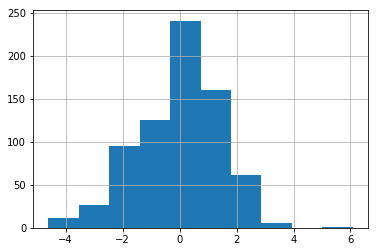

In [84]:
print(pca_df['pc4'].hist())



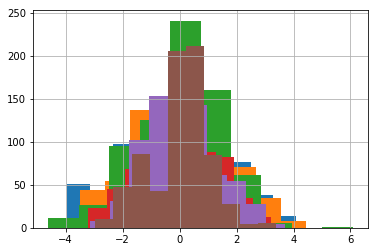

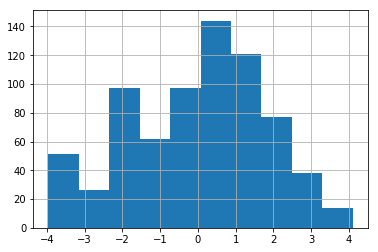

In [86]:
pca_df['pc2'].hist()


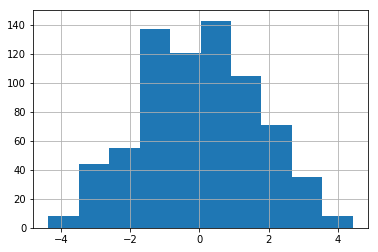

In [87]:
pca_df['pc3'].hist()


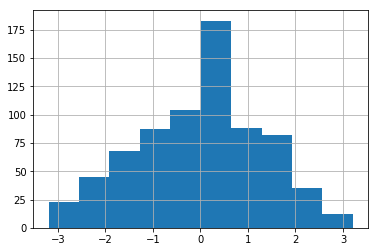

In [88]:
pca_df['pc5'].hist()


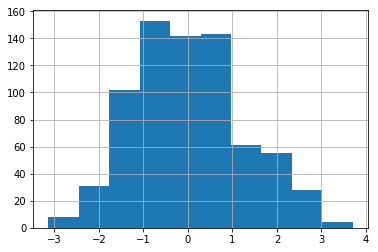

In [89]:
pca_df['pc6'].hist()

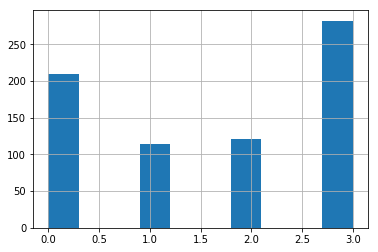

In [90]:
Ec_Data1['FACT__4'].hist()

In [58]:
type(pca_df)

pandas.core.frame.DataFrame

In [93]:
# Re running PCA with required columns
Req_Df =  pd.DataFrame()
Req_Df = pca_df.drop(['pc16', 'pc17', 'pc18', 'pc19','pc20', 'pc21', 'pc22', 'pc23', 'pc24', 'pc25', 'pc26', 'pc27', 'pc28',
                      'pc29', 'pc30'],axis=1)
Req_Df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15
0,-4.338365,-2.969082,0.008515,-0.758741,0.222836,-0.819732,-0.080693,-0.437382,0.173655,-0.537369,-0.129346,-0.418626,0.139652,-0.530879,0.698059
1,-1.422389,3.031545,-2.889961,-2.058350,3.209062,1.848032,1.933170,-0.728288,1.196076,0.008489,1.749405,-1.070217,-0.081314,0.524728,0.431612
2,0.092274,-0.405955,2.833661,-1.583581,-0.337161,-2.083084,0.142646,2.892139,-0.408684,-0.068979,-2.304341,-0.916966,-1.247947,-0.825535,1.041889
3,0.767100,0.607277,-0.128636,0.323350,0.627438,-2.043069,-1.277789,-0.341761,-1.164115,1.538196,-1.360772,0.102380,0.884205,1.019611,-0.449465
4,-4.447377,-2.368054,-1.824174,0.686196,1.126454,0.709377,1.472043,1.489187,-0.474811,-0.183053,-0.064047,-0.134109,0.272737,-0.439349,0.068214


In [97]:
# shaping data frame without demograhic & pca comopents
EC_NoDemo = Ey_Data.drop(['Gender','Marital status','age group','Educatuon','income','Job','Area',"FACT__1","FACT__2","FACT__3","FACT__4","FACT__5","FACT__6","FACT__7","FACT__8","FACT__9","FACT__10","FACT__11","FACT__12","FACT__13","FACT__14","FACT__15","FACT__16","FACT__17","FACT__18","FACT__19","FACT__20","FACT__21","FACT__22","FACT__23","FACT__24","FACT__25","FACT__26","FACT__27","FACT__28","FACT__29","FACT__30"],axis=1)
EC_NoDemo.columns


Index(['CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14'], dtype='object')

In [96]:
# creating data frame with PCA components
Ec_New = pd.concat([Req_Df,EC_NoDemo],axis=1)
Ec_New.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc12,pc13,pc14,pc15,CBB_9,CBB_10,CBB_11,CBB_12,CBB_13,CBB_14
0,-4.338365,-2.969082,0.008515,-0.758741,0.222836,-0.819732,-0.080693,-0.437382,0.173655,-0.537369,...,-0.418626,0.139652,-0.530879,0.698059,4,2,0,3,4,0
1,-1.422389,3.031545,-2.889961,-2.058350,3.209062,1.848032,1.933170,-0.728288,1.196076,0.008489,...,-1.070217,-0.081314,0.524728,0.431612,4,2,1,3,0,2
2,0.092274,-0.405955,2.833661,-1.583581,-0.337161,-2.083084,0.142646,2.892139,-0.408684,-0.068979,...,-0.916966,-1.247947,-0.825535,1.041889,3,1,0,3,4,2
3,0.767100,0.607277,-0.128636,0.323350,0.627438,-2.043069,-1.277789,-0.341761,-1.164115,1.538196,...,0.102380,0.884205,1.019611,-0.449465,3,1,0,0,4,1
4,-4.447377,-2.368054,-1.824174,0.686196,1.126454,0.709377,1.472043,1.489187,-0.474811,-0.183053,...,-0.134109,0.272737,-0.439349,0.068214,4,2,1,3,4,2


# Model For Gender

# PCA Visualization  Boxplot Histograms 


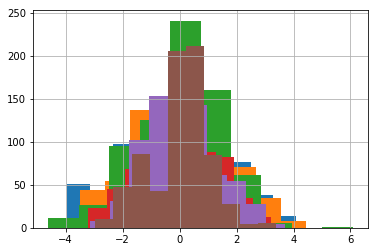

In [100]:
pca_df['pc2'].hist()
pca_df['pc3'].hist()
pca_df['pc4'].hist()
pca_df['pc5'].hist()
pca_df['pc6'].hist()
pca_df['pc7'].hist()

In [103]:
# Adding required demographic variable & build the model in Ec_Data1
Ec_Gender = pd.concat([Ec_New,Ey_Data[['Gender']]],axis=1)
Ec_Gender.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc13,pc14,pc15,CBB_9,CBB_10,CBB_11,CBB_12,CBB_13,CBB_14,Gender
0,-4.338365,-2.969082,0.008515,-0.758741,0.222836,-0.819732,-0.080693,-0.437382,0.173655,-0.537369,...,0.139652,-0.530879,0.698059,4,2,0,3,4,0,0
1,-1.422389,3.031545,-2.889961,-2.058350,3.209062,1.848032,1.933170,-0.728288,1.196076,0.008489,...,-0.081314,0.524728,0.431612,4,2,1,3,0,2,0
2,0.092274,-0.405955,2.833661,-1.583581,-0.337161,-2.083084,0.142646,2.892139,-0.408684,-0.068979,...,-1.247947,-0.825535,1.041889,3,1,0,3,4,2,0
3,0.767100,0.607277,-0.128636,0.323350,0.627438,-2.043069,-1.277789,-0.341761,-1.164115,1.538196,...,0.884205,1.019611,-0.449465,3,1,0,0,4,1,0
4,-4.447377,-2.368054,-1.824174,0.686196,1.126454,0.709377,1.472043,1.489187,-0.474811,-0.183053,...,0.272737,-0.439349,0.068214,4,2,1,3,4,2,0


In [110]:
# Bulding model
X= Ec_Gender[['CBB_9','CBB_10','CBB_11','CBB_12','CBB_13','CBB_14','pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15']]
y=Ec_Gender['Gender']
from sklearn.cross_validation 
import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=101)

SyntaxError: invalid syntax (<ipython-input-110-842bfb43f474>, line 4)

In [106]:
X.head()

,CBB_9,CBB_10,CBB_11,CBB_12,CBB_13,CBB_14,pc1,pc2,pc3,pc4,...,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15
0,4,2,0,3,4,0,-4.338365,-2.969082,0.008515,-0.758741,...,-0.819732,-0.080693,-0.437382,0.173655,-0.537369,-0.129346,-0.418626,0.139652,-0.530879,0.698059
1,4,2,1,3,0,2,-1.422389,3.031545,-2.889961,-2.058350,...,1.848032,1.933170,-0.728288,1.196076,0.008489,1.749405,-1.070217,-0.081314,0.524728,0.431612
2,3,1,0,3,4,2,0.092274,-0.405955,2.833661,-1.583581,...,-2.083084,0.142646,2.892139,-0.408684,-0.068979,-2.304341,-0.916966,-1.247947,-0.825535,1.041889
3,3,1,0,0,4,1,0.767100,0.607277,-0.128636,0.323350,...,-2.043069,-1.277789,-0.341761,-1.164115,1.538196,-1.360772,0.102380,0.884205,1.019611,-0.449465
4,4,2,1,3,4,2,-4.447377,-2.368054,-1.824174,0.686196,...,0.709377,1.472043,1.489187,-0.474811,-0.183053,-0.064047,-0.134109,0.272737,-0.439349,0.068214


In [107]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

# Logistic for Gender

In [37]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
predictions =  logmodel.predict(X_test)
print(predictions)

[1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0
 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1]


In [42]:
# printing predictions
print(classification_report(y_test,predictions))
print("confuison matrix")
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.71      0.51      0.59       113
          1       0.60      0.77      0.67       106

avg / total       0.65      0.64      0.63       219

confuison matrix
[[58 55]
 [24 82]]


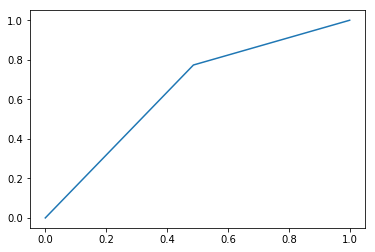

In [43]:
# computing ROC curve
fpr, tpr, _ = roc_curve(y_test,predictions)
plt.clf()
plt.plot(fpr,tpr)
plt.show()

In [44]:
# Roc curve score
roc_auc_score(y_test,predictions)

0.6434296209717817

In [45]:
auc(fpr,tpr)

0.6434296209717817

In [46]:
# model validation
cohen_kappa_score(y_test, predictions)

0.284284118644769

# Decision tree For Gender

In [47]:
# Decision tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
Dpredict = clf.predict(X_test)
print(classification_report(y_test,Dpredict))
print(confusion_matrix(y_test,Dpredict))

             precision    recall  f1-score   support

          0       0.61      0.42      0.49       113
          1       0.54      0.72      0.61       106

avg / total       0.57      0.56      0.55       219

[[47 66]
 [30 76]]


In [49]:
cohen_kappa_score(y_test,Dpredict)

0.13152676801057506

# Navie bisen for Gender

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
Naive_Gender = GaussianNB()
# multiple variables
multiNaive = MultinomialNB()
Naive_Gender.fit(X_train, y_train)

GaussianNB(priors=None)

In [53]:
Npredict = Naive_Gender.predict(X_test)
Npredict

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1],
      dtype=int64)

In [54]:
# printing predictions
print(classification_report(y_test,Npredict))
print("confuison matrix")
print(confusion_matrix(y_test,Npredict))

             precision    recall  f1-score   support

          0       0.70      0.44      0.54       113
          1       0.57      0.80      0.67       106

avg / total       0.64      0.62      0.60       219

confuison matrix
[[50 63]
 [21 85]]


# KNN model for Gender

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [58]:
knnpred = knn.predict(X_test)
knnpred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [59]:
# printing predictions
print(classification_report(y_test,pred))
print("confuison matrix")
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.60      0.47      0.52       113
          1       0.54      0.66      0.59       106

avg / total       0.57      0.56      0.56       219

confuison matrix
[[53 60]
 [36 70]]


# Logistic model for Age

In [60]:
Ec_Age = pd.concat([Ec_New,Ey_Data[['age group']]],axis=1)

In [61]:
# Training and Testing
X1= Ec_Age[['CBB_9','CBB_10','CBB_11','CBB_12','CBB_13','CBB_14','pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15']]
y1=Ec_Age['age group']
X1_train,X1_test,y1_train,y1_test =  train_test_split(X1,y1,test_size=0.3,random_state=101)

In [62]:
# Bulding model
logmodel = LogisticRegression()
logmodel.fit(X1_train,y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
predictions =  logmodel.predict(X1_test)

In [64]:
# printing predictions
print(classification_report(y1_test,predictions))
print("confuison matrix")
print(confusion_matrix(y1_test,predictions))

             precision    recall  f1-score   support

          0       0.67      0.28      0.39        43
          1       0.62      0.64      0.63        72
          2       0.72      0.94      0.82        50
          3       0.76      0.94      0.84        50
          4       0.00      0.00      0.00         4

avg / total       0.67      0.69      0.66       219

confuison matrix
[[12 22  6  3  0]
 [ 6 46  9 11  0]
 [ 0  2 47  1  0]
 [ 0  3  0 47  0]
 [ 0  1  3  0  0]]


C:\Users\Dell 5370\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision tree for Age

In [65]:
# Decision tree
clf = tree.DecisionTreeClassifier()
clf.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
Dpredict = clf.predict(X1_test)
print(classification_report(y1_test,Dpredict))
print("confusion matrix")
print(confusion_matrix(y1_test,Dpredict))

             precision    recall  f1-score   support

          0       0.43      0.44      0.44        43
          1       0.58      0.58      0.58        72
          2       0.74      0.80      0.77        50
          3       0.81      0.76      0.78        50
          4       0.00      0.00      0.00         4

avg / total       0.63      0.63      0.63       219

confusion matrix
[[19 19  3  2  0]
 [17 42  6  7  0]
 [ 3  7 40  0  0]
 [ 5  4  2 38  1]
 [ 0  1  3  0  0]]


# KNN model for Age

In [67]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X1_train,y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [68]:
pred = knn.predict(X1_test)

In [69]:
# printing predictions
print(classification_report(y1_test,pred))
print("confuison matrix")
print(confusion_matrix(y1_test,pred))

             precision    recall  f1-score   support

          0       0.44      0.37      0.41        43
          1       0.53      0.67      0.59        72
          2       0.71      0.72      0.71        50
          3       0.80      0.64      0.71        50
          4       0.00      0.00      0.00         4

avg / total       0.61      0.60      0.60       219

confuison matrix
[[16 22  5  0  0]
 [11 48  6  7  0]
 [ 6  7 36  1  0]
 [ 3 11  2 32  2]
 [ 0  2  2  0  0]]


# Navie bisen for Age - Not worked for Age

# Marital status

In [73]:
Ec_Marital = pd.concat([Ec_New,Ey_Data[['Marital status']]],axis=1)

In [74]:
Xm= Ec_Marital[['CBB_9','CBB_10','CBB_11','CBB_12','CBB_13','CBB_14','pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15']]
ym=Ec_Marital['Marital status']
Xm_train,Xm_test,ym_train,ym_test =  train_test_split(Xm,ym,test_size=0.3,random_state=101)

# logistic Model

In [75]:
logmodel = LogisticRegression()
logmodel.fit(Xm_train,ym_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
predictions =  logmodel.predict(Xm_test)
predictions

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [78]:
print(classification_report(ym_test,predictions))
print("confuison matrix")
print(confusion_matrix(ym_test,predictions))

             precision    recall  f1-score   support

          0       0.76      0.76      0.76       135
          1       0.61      0.61      0.61        84

avg / total       0.70      0.70      0.70       219

confuison matrix
[[103  32]
 [ 33  51]]


# Decision Tree Martial status

In [79]:
#  Decision tree
clf = tree.DecisionTreeClassifier()
clf.fit(Xm_train,ym_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [82]:
clfpre =  clf.predict(Xm_test)
clfpre

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [80]:
Dpredict = clf.predict(Xm_test)
print(classification_report(ym_test,Dpredict))
print("confusion matrix")
print(confusion_matrix(ym_test,Dpredict))

             precision    recall  f1-score   support

          0       0.70      0.66      0.68       135
          1       0.49      0.54      0.51        84

avg / total       0.62      0.61      0.61       219

confusion matrix
[[89 46]
 [39 45]]


In [83]:
Dpredict = clf.predict(Xm_test)
Dpredict

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1],
      dtype=int64)

# KNN model for Martial status

In [ ]:
# Knn model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xm_train,ym_train)

In [ ]:
pred = knn.predict(Xm_test)

In [ ]:
# printing predictions
print(classification_report(ym_test,pred))
print("confuison matrix")
print(confusion_matrix(ym_test,pred))

# Navie bisen for Martial Status

In [ ]:
Naive_NB = GaussianNB()
#multiNaive = MultinomialNB()
Naive_NB.fit(Xm_train, ym_train)

In [ ]:
Npredict = Naive_NB.predict(Xm_test)

In [ ]:
print(classification_report(ym_test,Npredict))
print("confuison matrix")
print(confusion_matrix(ym_test,Npredict))

# Area Model

In [ ]:
Ec_Area = pd.concat([Ec_New,Ey_Data[['Area']]],axis=1)

In [ ]:
Xa= Ec_Area[['CBB_9','CBB_10','CBB_11','CBB_12','CBB_13','CBB_14','pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15']]
ya=Ec_Area['Area']
Xa_train,Xa_test,ya_train,ya_test =  train_test_split(Xa,ya,test_size=0.3,random_state=101)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(Xa_train,ya_train)

In [ ]:
predictions =  logmodel.predict(Xa_test)

In [ ]:
print(classification_report(ya_test,predictions))
print("confuison matrix")
print(confusion_matrix(ya_test,predictions))

In [ ]:
Ec_Area['Area'].tail()



In [ ]:
fat.sample(5)
